# Sampling Methods

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

# Random seed for replicability
seed = 42

In [20]:
data = pd.read_csv("../data/creditcard.csv")
X = data.drop('Class', axis=1)
print(X.shape)
y = data['Class']

(284807, 30)


## Introduction
In the EDA we ahve already seen that the data is heavily imbalanced.

In [21]:
# Print share of fraud and no fraudv
print(f"No fraud: {round(y.value_counts()[0]/data.shape[0] * 100, 3)} %")
print(f"Fraud: {round(y.value_counts()[1]/data.shape[0] * 100, 3)} %")

No fraud: 99.827 %
Fraud: 0.173 %


Sampling methods can help to deal with that problem.

## SMOTE: Synthetic Minority Over-sampling Technique

In [4]:
from imblearn.over_sampling import SMOTE # ref: https://imbalanced-learn.readthedocs.io/

In [30]:
X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_resample(X, y)

In [31]:
print(X_smote.shape)

(568630, 30)


In [32]:
# Print share of fraud and no fraud
print("After SMOTE (Oversampling):")
print(f"No fraud: {round(np.bincount(y_smote)[0]/y_smote.shape[0] * 100, 3)} %")
print(f"Fraud: {round(np.bincount(y_smote)[1]/y_smote.shape[0] * 100, 3)} %")

After SMOTE (Oversampling):
No fraud: 50.0 %
Fraud: 50.0 %


Now we have a perfectly balanced dataset!

## Equally big Sub-samples

In [43]:
# Get all the fraudulent transactions
fraud = data[data['Class'] == 1]
num_fraudulent_transactions = fraud.shape[0]

# Sample a set of the same size from the non-fraudulent transactions
non_fraud = data[data['Class'] == 0].sample(num_fraudulent_transactions)

df_sub = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=seed)

X_sub = df_sub.drop('Class', axis=1)
y_sub = df_sub['Class']

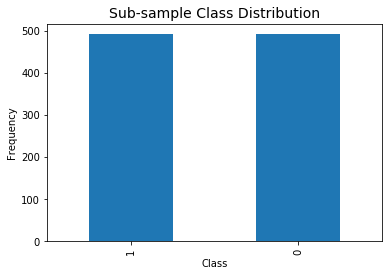

In [26]:
# Plot Class Distribution
y_sub.value_counts().plot(kind='bar')
plt.title('Sub-sample Class Distribution', fontsize=14)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Let's have a look at the data clustered data:

In [46]:
X_sub_tsne = TSNE(n_components=2, random_state=seed).fit_transform(X_sub)

In [47]:
def plot_cluster(X, y):
    fig = plt.figure(figsize=(12, 12))
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==0), label='No Fraud', linewidth=2)
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==1), label='Fraud', linewidth=2)
    plt.title('t-SNE', fontsize=14)
    plt.show()

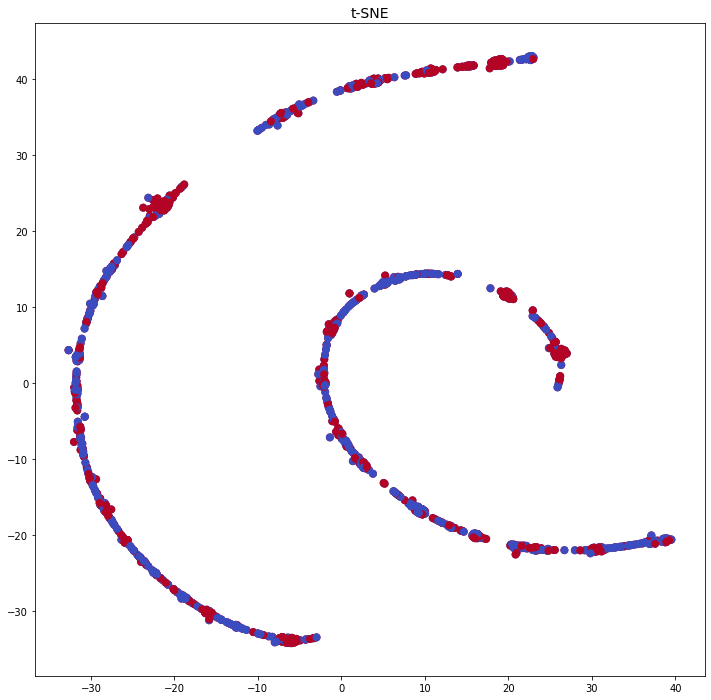

In [48]:
plot_cluster(X_sub_tsne, y_sub)

This looks very much like the data isn't linearily separable at all! We will look at a bigger sample later to confirm that suspicion.

##  Undersampling
https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now